In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys

import numpy as np
import pandas as pd

sys.path.insert(0, '..')
from match.make_match_panel import make_match_panel
from match.make_summary_match_panel import make_summary_match_panel
from match.make_comparison_panel import make_comparison_panel

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x121704c80> (1 process) ...
Computing MoEs with 3 samplings ...
Computing P-Values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.


,Score,0.95 MoE,P-Value,FDR
Gene Set,,,,
YAP signature based on cell NIH3T3_MCD10A in paper GENES & DEVELOPMENT 22:1962–1971 2008,0.865167,0.000574,0.037037,0.333333
GO_14_3_3_PROTEIN_BINDING,0.523070,0.170592,0.148148,0.555556
GO_SH2_DOMAIN_BINDING,0.396716,0.214579,0.185185,0.555556
"YAP signature based on cell HEK293 in paper Cell 150, 780–791, August 17, 2012",0.283160,0.239616,0.333333,0.750000
ONGUSAHA_TP53_TARGETS,0.188894,0.480071,0.518519,0.933333
BIOCARTA_RHO_PATHWAY,-0.373638,0.182085,0.222222,0.500000
VANTVEER_BREAST_CANCER_BRCA1_UP,-0.404066,0.559410,0.148148,0.444444
GO_NEURON_CELL_CELL_ADHESION,-0.658196,0.160701,0.074074,0.333333
YAP signature based on mechanism,-0.865856,0.000826,0.037037,0.333333


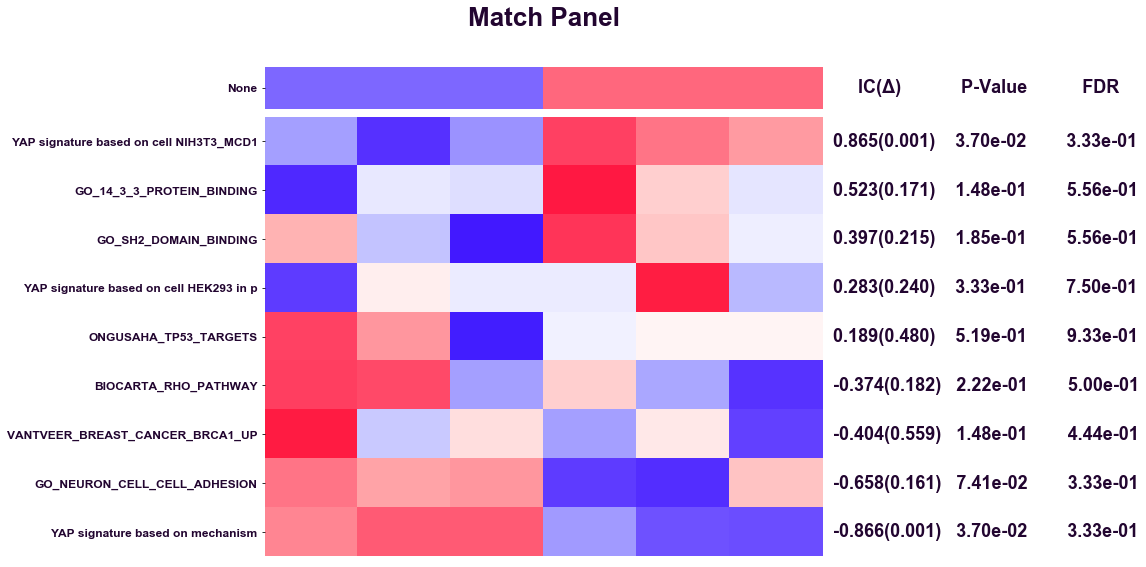

In [3]:
features = pd.read_table('gene_set_x_sample.tsv', index_col=0)

target_str = pd.Series(('A', ) * 3 + ('B', ) * 3, index=features.columns)

make_match_panel(target_str, features, max_ytick_size=39)

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x121704c80> (1 process) ...
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
Computing MoEs with 3 samplings ...
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
Computing P-Values and FDRs with 3

../match/nd_array/nd_array/compute_empirical_p_value.py:13: RuntimeWarning: invalid value encountered in less_equal
  significant_random_values = random_values <= value
../match/nd_array/nd_array/compute_empirical_p_value.py:16: RuntimeWarning: invalid value encountered in greater_equal
  significant_random_values = value <= random_values


,Score,0.95 MoE,P-Value,FDR
Name,,,,
hydroxyphenylacetate,0.838490,NaN,0.001244,0.055556
C58:11 TAG,0.741950,NaN,0.001244,0.055556
cobalamin,0.572858,0.408617,0.004975,0.133333
niacinamide,0.548765,0.451332,0.004975,0.133333
thiamine,0.515596,0.449692,0.004975,0.133333
tyrosine,0.511692,0.114007,0.004975,0.133333
C18:0 LPE,0.450106,0.314868,0.013682,0.305556
C20:4 LPE,0.444891,0.0352014,0.013682,0.305556
homocystine,0.430386,0.401345,0.021144,0.383333


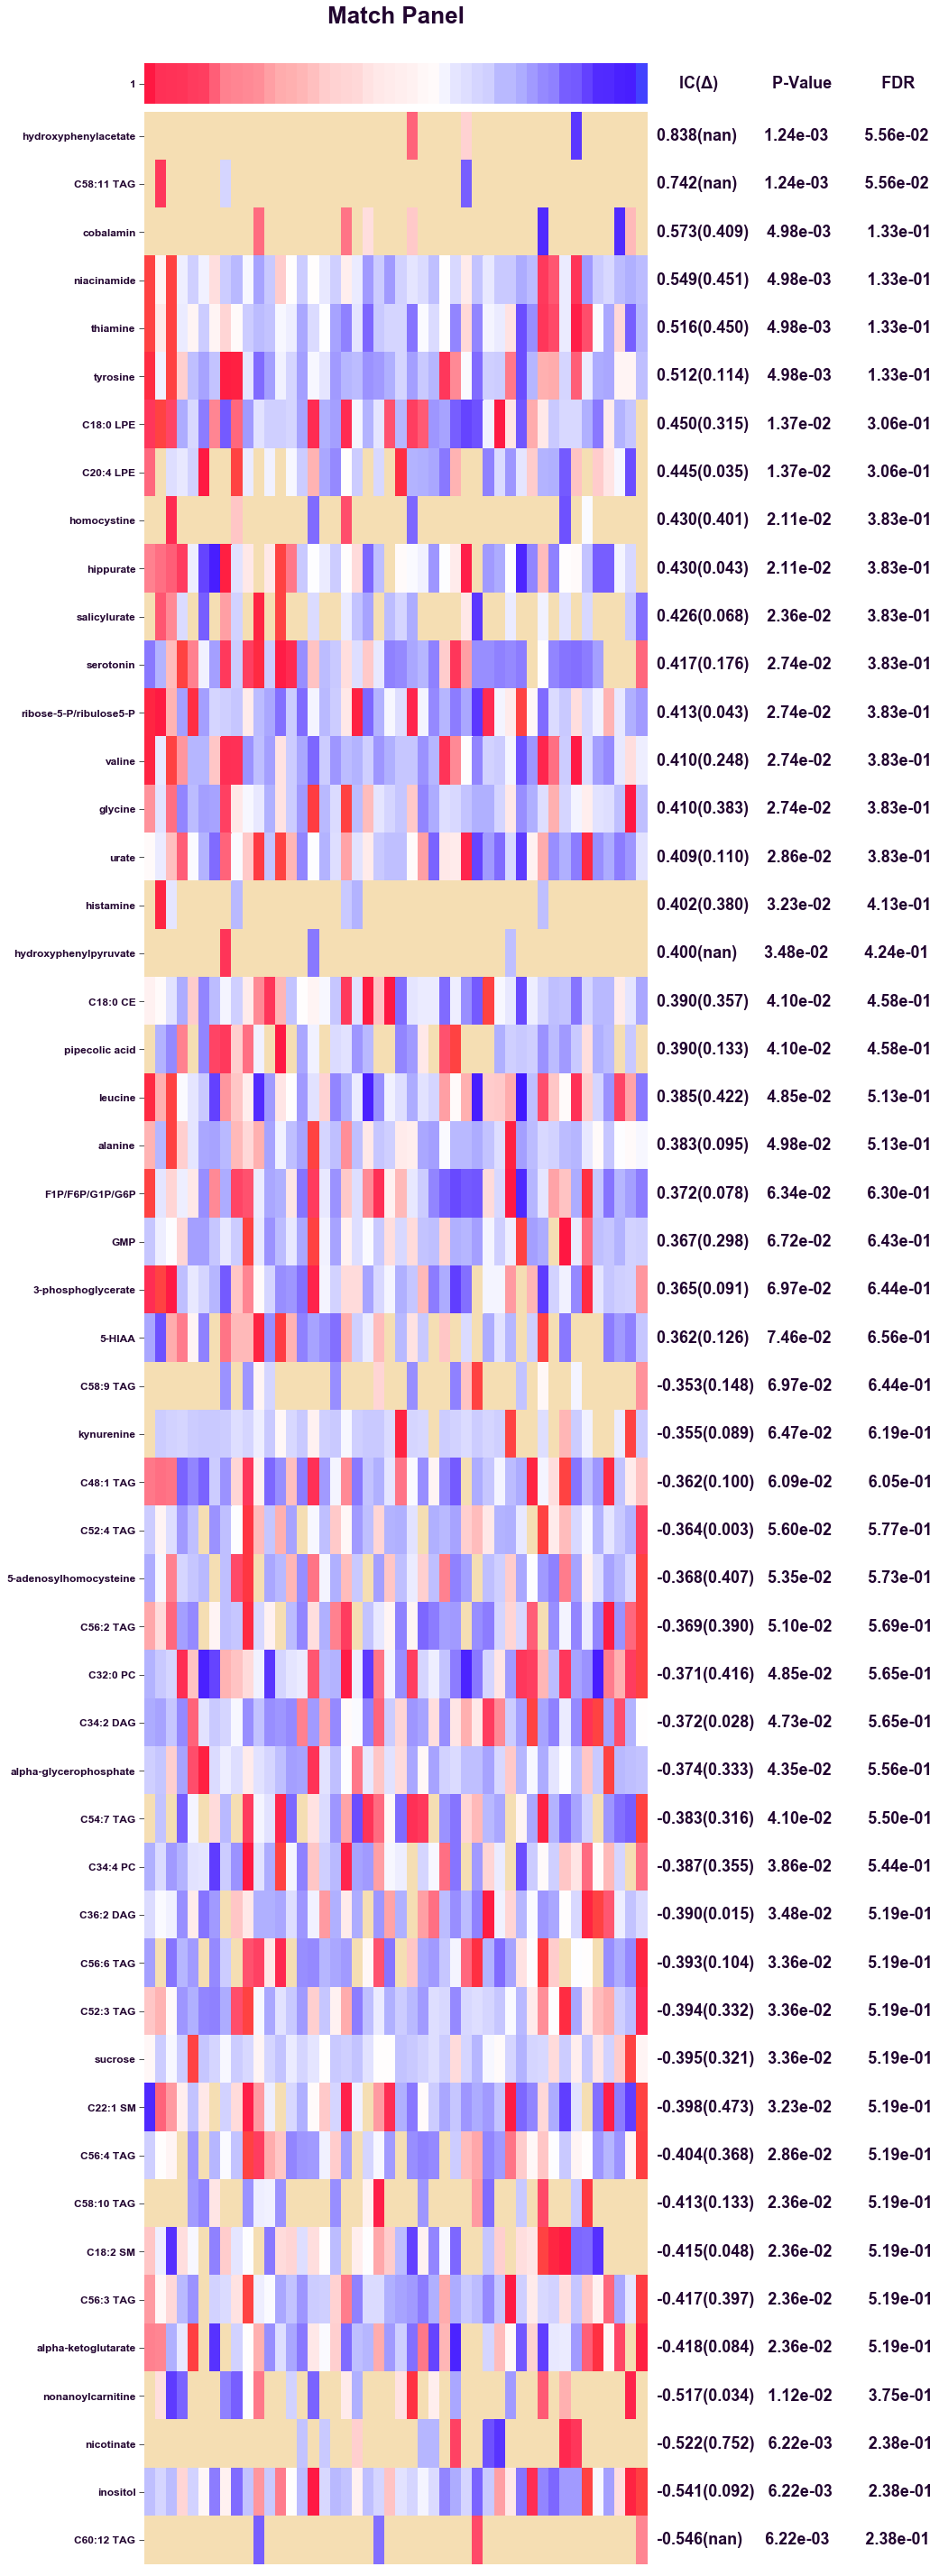

In [4]:
target = pd.read_table('target.tsv', index_col=0, header=None, squeeze=True)

features = pd.read_table('features.tsv', index_col=0)

make_match_panel(target, features)

In [5]:
n_row = 100
n_column = 100

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x121704c80> (2 process) ...
Computing MoEs with 3 samplings ...
Computing P-Values and FDRs with 3 permutations ...
Computing P-Values and FDRs with 3 permutations ...
	1/3 ...
	1/3 ...
	3/3 - done.
	3/3 - done.


,Score,0.95 MoE,P-Value,FDR
Feature 98,0.284654,0.09684,0.003333,0.111111
Feature 63,0.277420,0.019621,0.003333,0.111111
Feature 92,0.263428,0.126503,0.006667,0.111111
Feature 51,0.260003,0.00408679,0.006667,0.111111
Feature 48,0.245617,0.062811,0.006667,0.111111
Feature 5,0.237512,0.0595016,0.006667,0.111111
Feature 15,0.230439,0.029253,0.013333,0.181818
Feature 67,0.223406,0.0454119,0.016667,0.181818
Feature 20,0.222326,0.21174,0.016667,0.181818
Feature 68,0.217707,0.040616,0.020000,0.181818


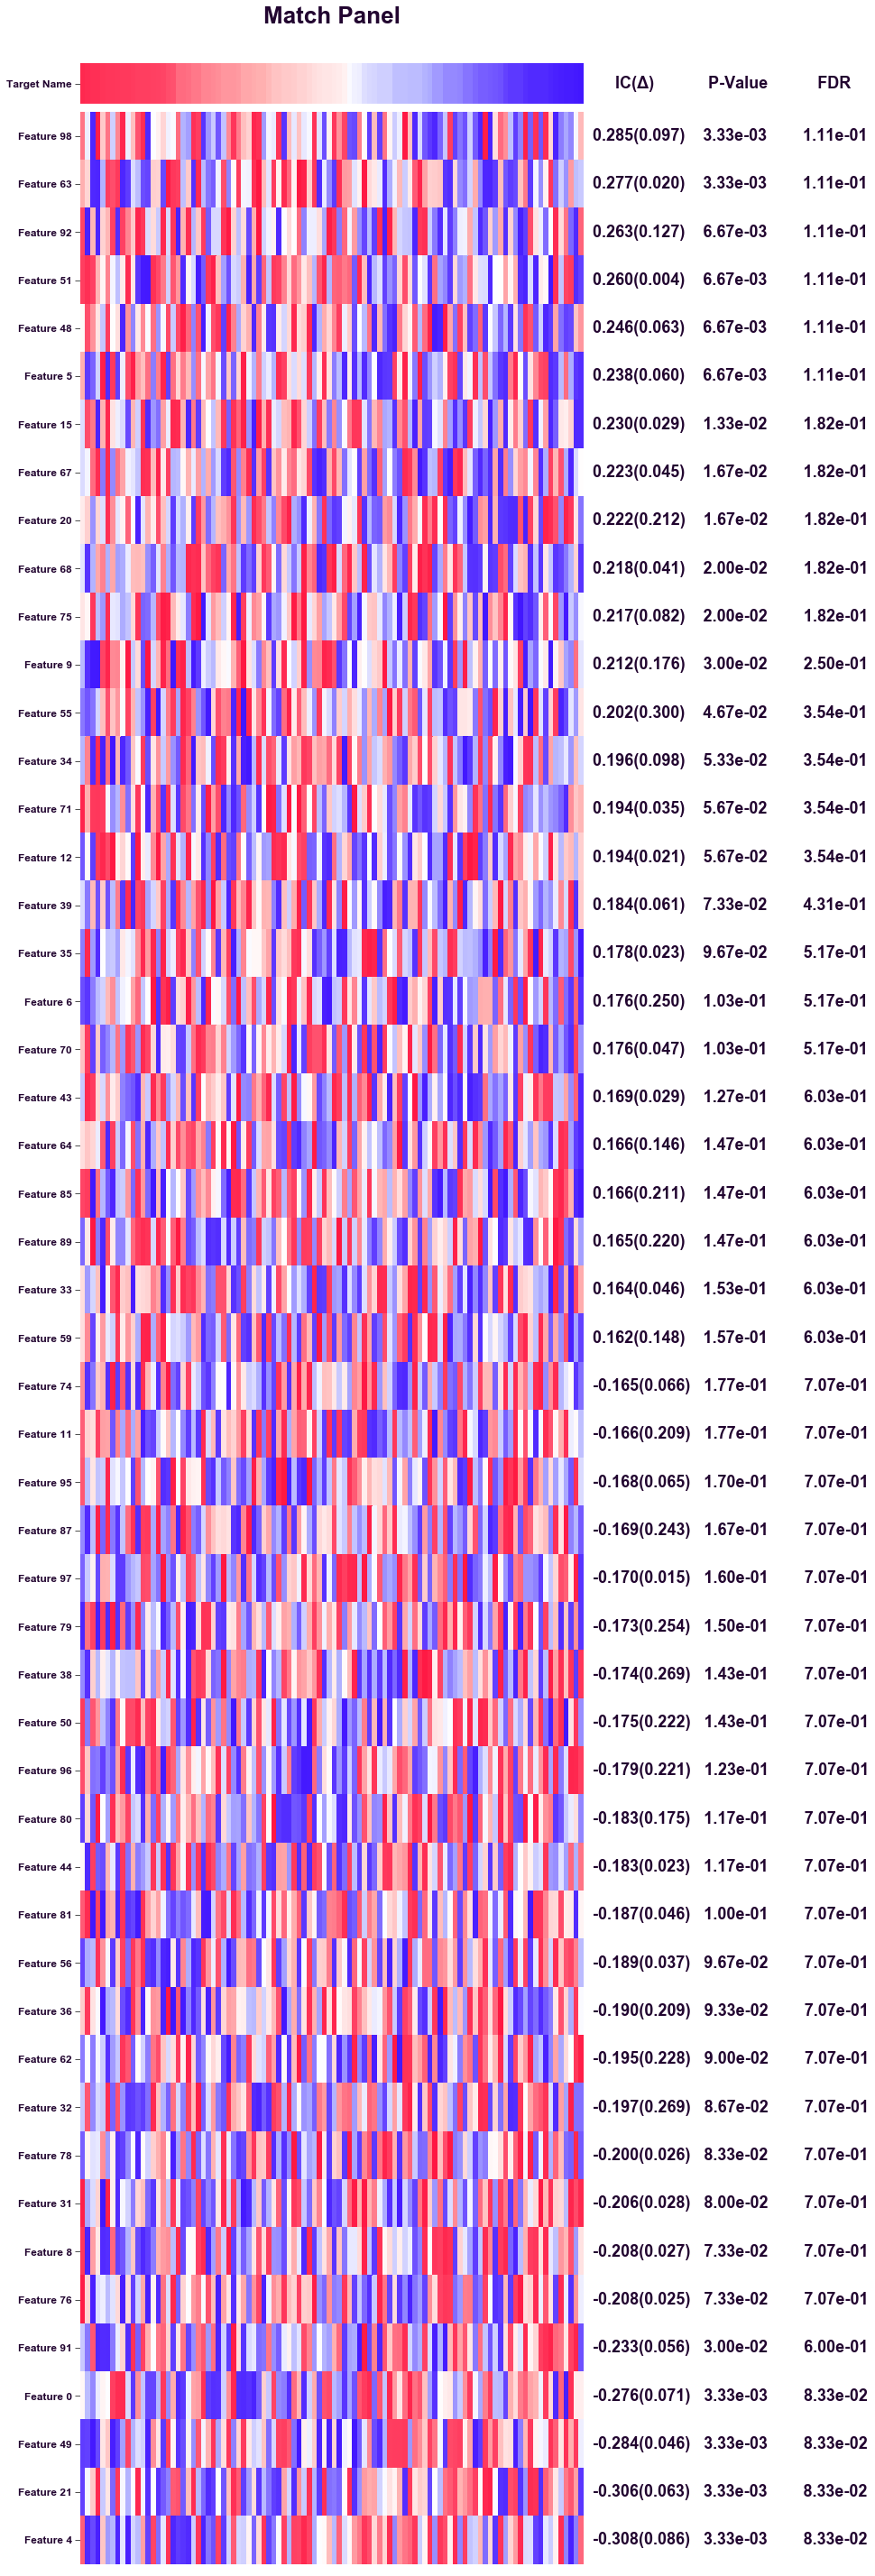

In [6]:
target = pd.Series(
    np.random.random_sample(n_column),
    name='Target Name',
    index=('Sample {}'.format(i) for i in range(n_column)))

features_continuous = pd.DataFrame(
    np.random.random_sample((
        n_row,
        n_column, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(target, features_continuous, n_job=2)

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x121704c80> (2 process) ...
Computing MoEs with 3 samplings ...
Computing P-Values and FDRs with 3 permutations ...
	1/3 ...
Computing P-Values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
	3/3 - done.


,Score,0.95 MoE,P-Value,FDR
Feature 16,0.228187,0.0251671,0.016667,0.555556
Feature 78,0.224550,0.0394369,0.016667,0.555556
Feature 7,0.222298,0.0883793,0.016667,0.555556
Feature 81,0.215972,0.139751,0.026667,0.666667
Feature 8,0.193443,0.206711,0.050000,0.722222
Feature 66,0.184760,0.0142457,0.056667,0.722222
Feature 33,0.176716,0.222209,0.070000,0.722222
Feature 29,0.173970,0.0444587,0.073333,0.722222
Feature 97,0.173479,0.0444555,0.073333,0.722222
Feature 40,0.167287,0.081244,0.086667,0.722222


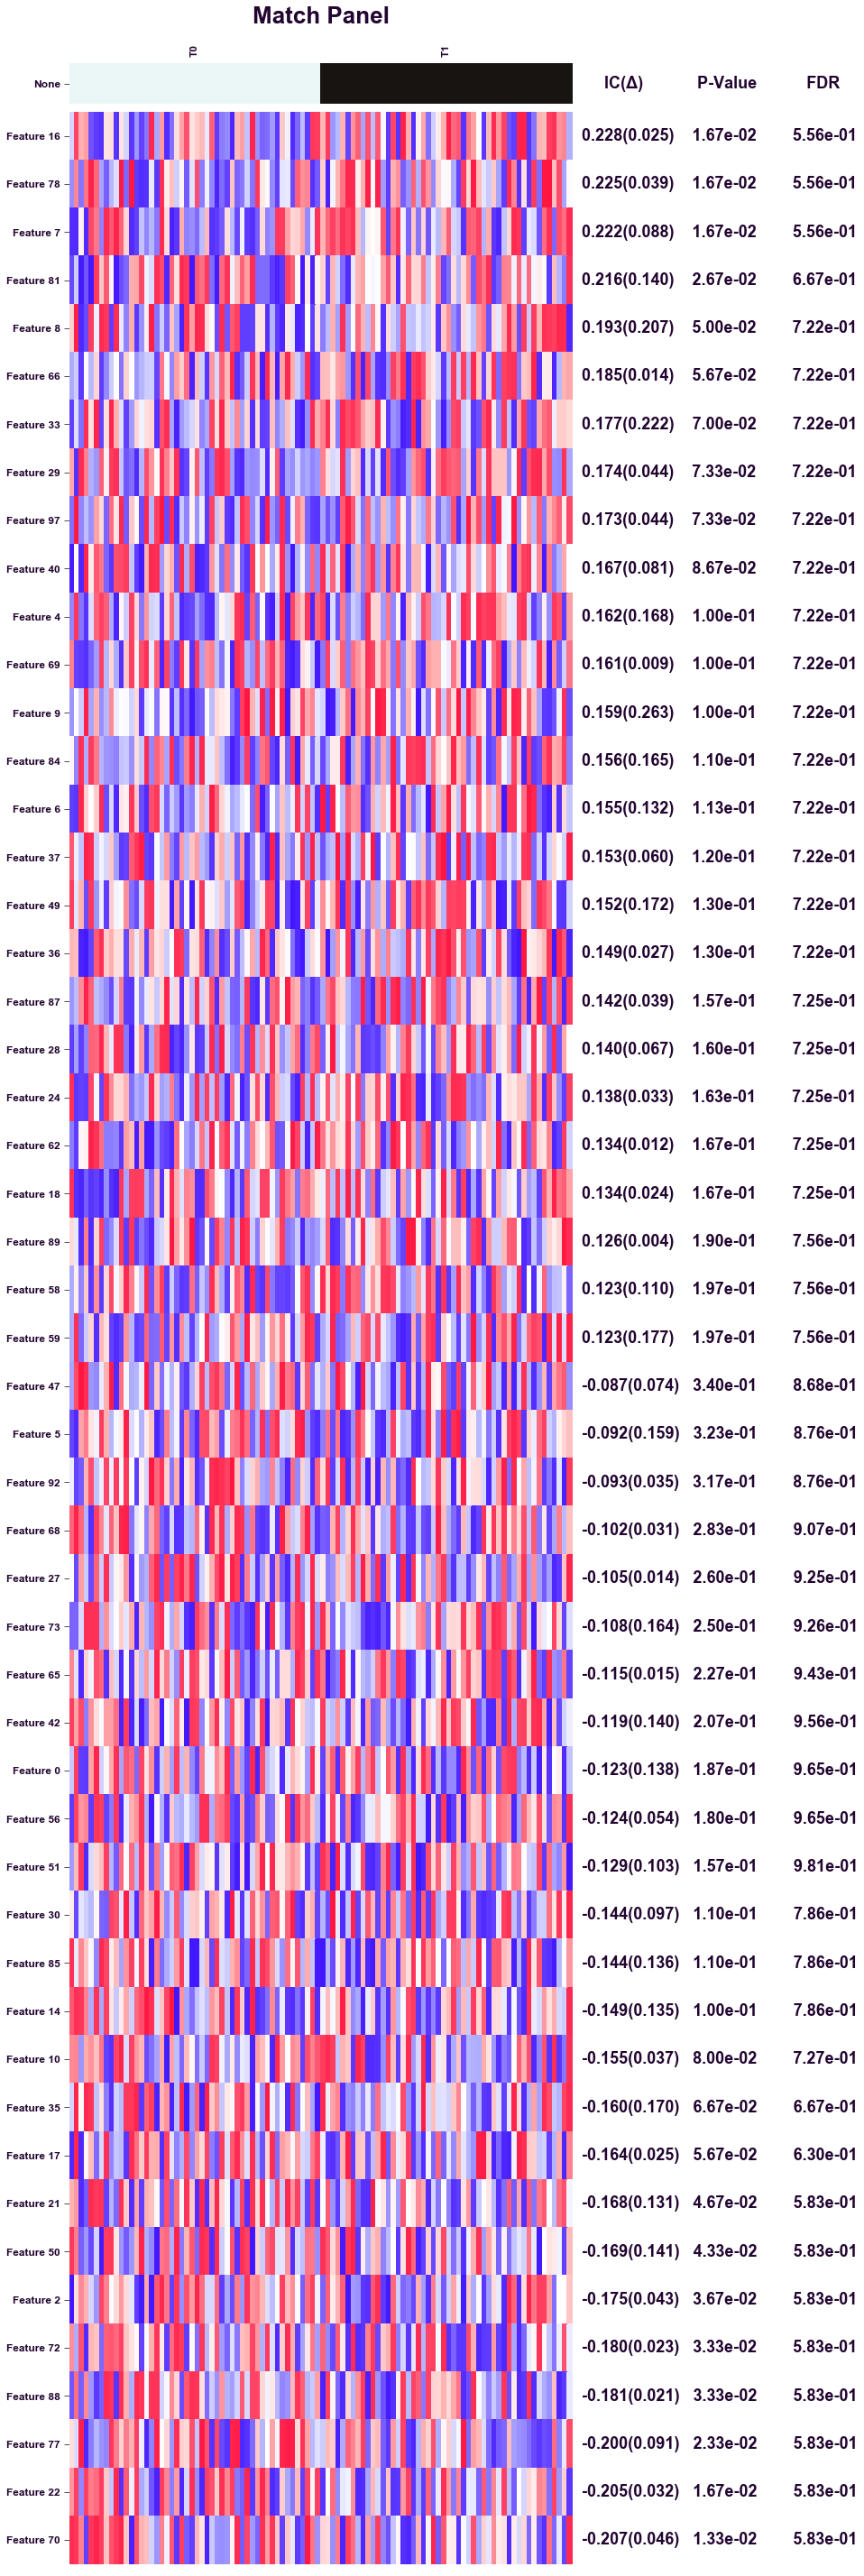

In [7]:
target_str = pd.Series(
    ('T0', ) * (n_column // 2) + ('T1', ) * (n_column // 2),
    index=target.index)

make_match_panel(
    target_str, features_continuous, target_type='binary', n_job=2)

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x121704c80> (2 process) ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 5 + 1) instead


Computing MoEs with 3 samplings ...
Computing P-Values and FDRs with 3 permutations ...
Computing P-Values and FDRs with 3 permutations ...
	1/3 ...
	1/3 ...
	3/3 - done.
	3/3 - done.


,Score,0.95 MoE,P-Value,FDR
Feature 50,0.272623,0.0985998,0.006667,0.571429
Feature 83,0.249865,0.0318001,0.013333,0.571429
Feature 0,0.226425,0.24757,0.023333,0.571429
Feature 13,0.223202,0.236041,0.023333,0.571429
Feature 57,0.205638,0.0445982,0.036667,0.571429
Feature 75,0.204713,0.0657655,0.036667,0.571429
Feature 61,0.199258,0.275936,0.040000,0.571429
Feature 47,0.193018,0.203768,0.046667,0.583333
Feature 17,0.189654,0.0353851,0.053333,0.592593
Feature 98,0.184416,0.165286,0.066667,0.606061


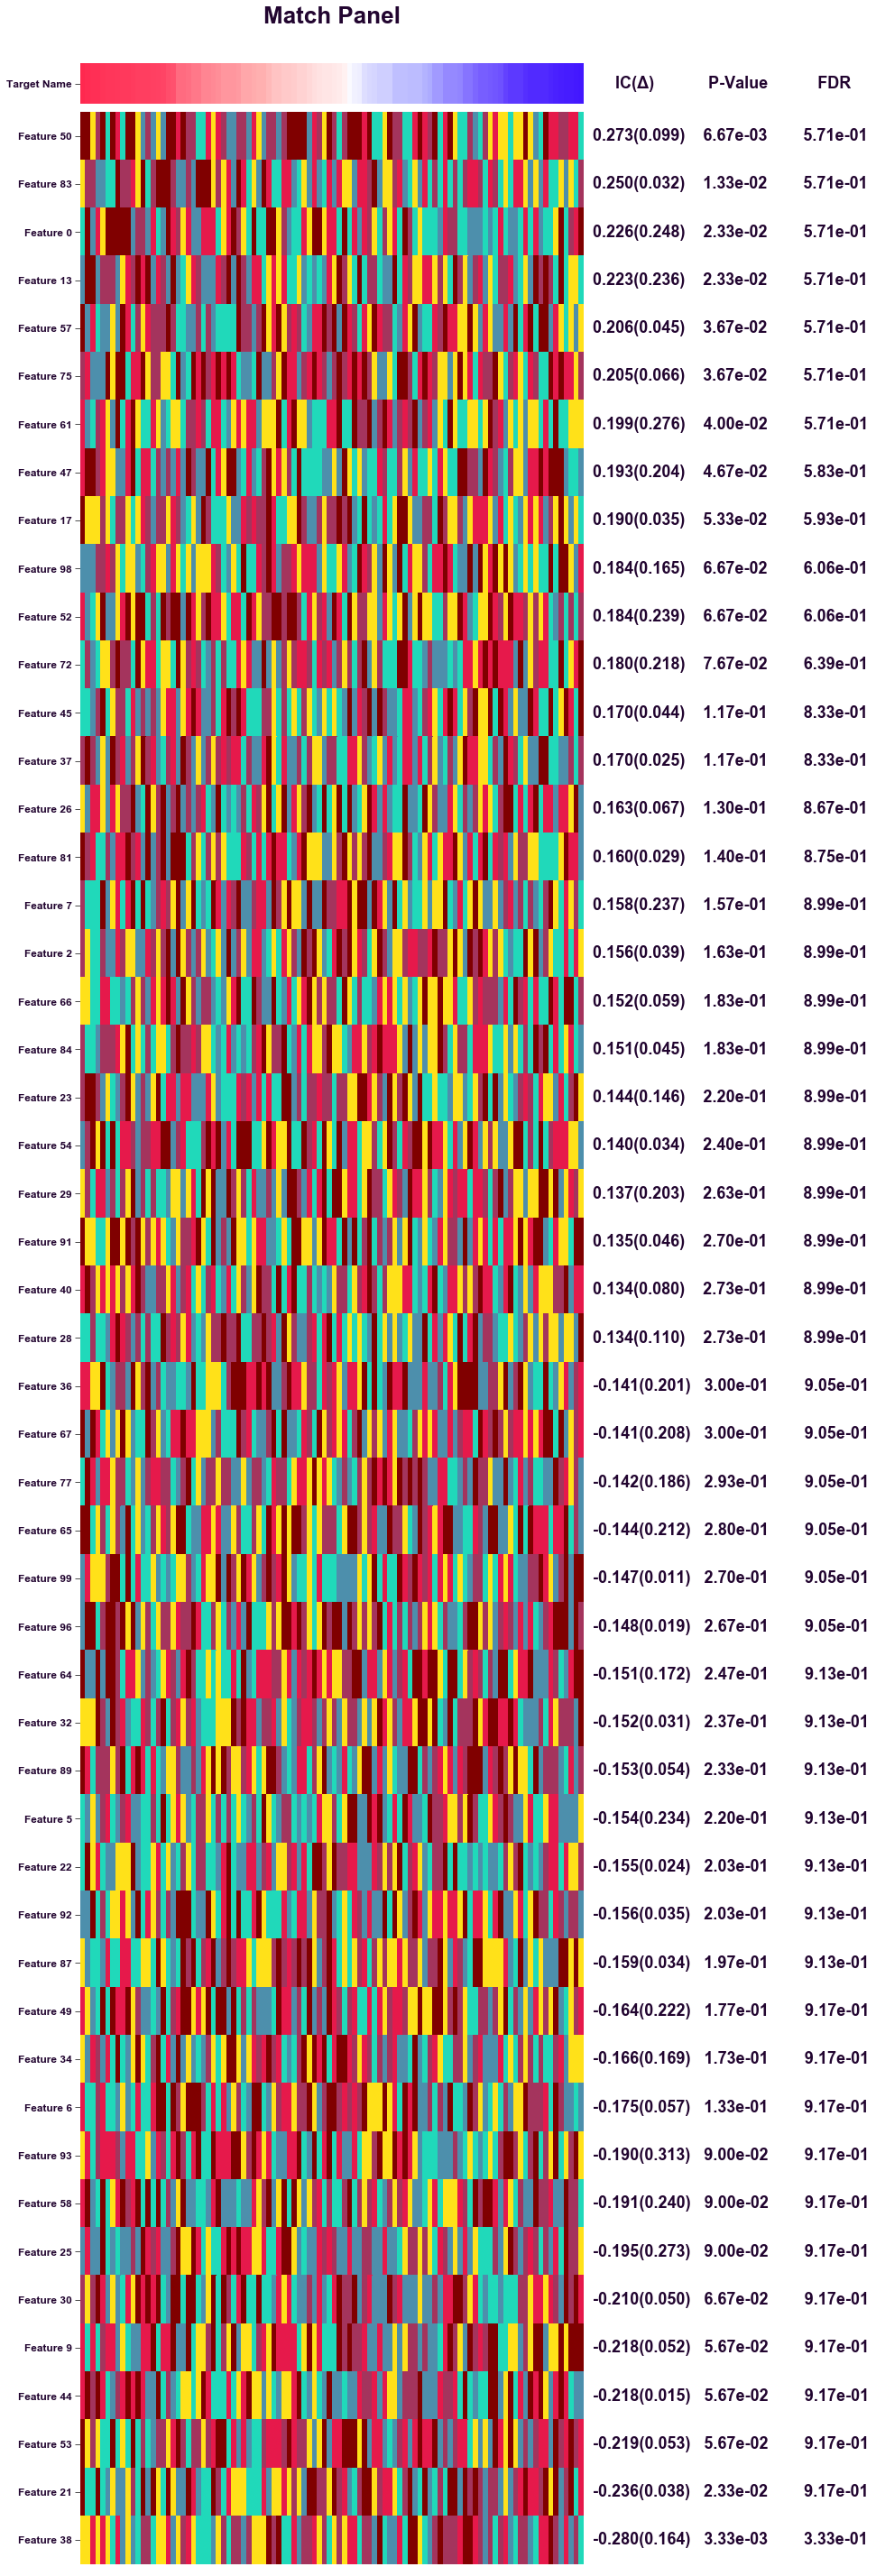

In [8]:
features_categorical = pd.DataFrame(
    np.random.random_integers(0, 5, size=(
        n_row,
        n_column, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(
    target, features_categorical, features_type='categorical', n_job=2)

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x121704c80> (2 process) ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


Computing MoEs with 3 samplings ...
Computing P-Values and FDRs with 3 permutations ...
Computing P-Values and FDRs with 3 permutations ...
	1/3 ...
	1/3 ...
	3/3 - done.
	3/3 - done.


,Score,0.95 MoE,P-Value,FDR
Feature 50,0.270268,0.0590554,0.003333,0.333333
Feature 56,0.218448,0.0790806,0.010000,0.500000
Feature 20,0.206244,0.242517,0.020000,0.666667
Feature 23,0.204487,0.0590618,0.030000,0.750000
Feature 27,0.193274,0.00868147,0.043333,0.814815
Feature 54,0.185798,0.163475,0.060000,0.814815
Feature 30,0.182998,0.237712,0.060000,0.814815
Feature 22,0.179300,0.0104342,0.066667,0.814815
Feature 73,0.175007,0.191598,0.073333,0.814815
Feature 41,0.162633,0.0475748,0.096667,0.826667


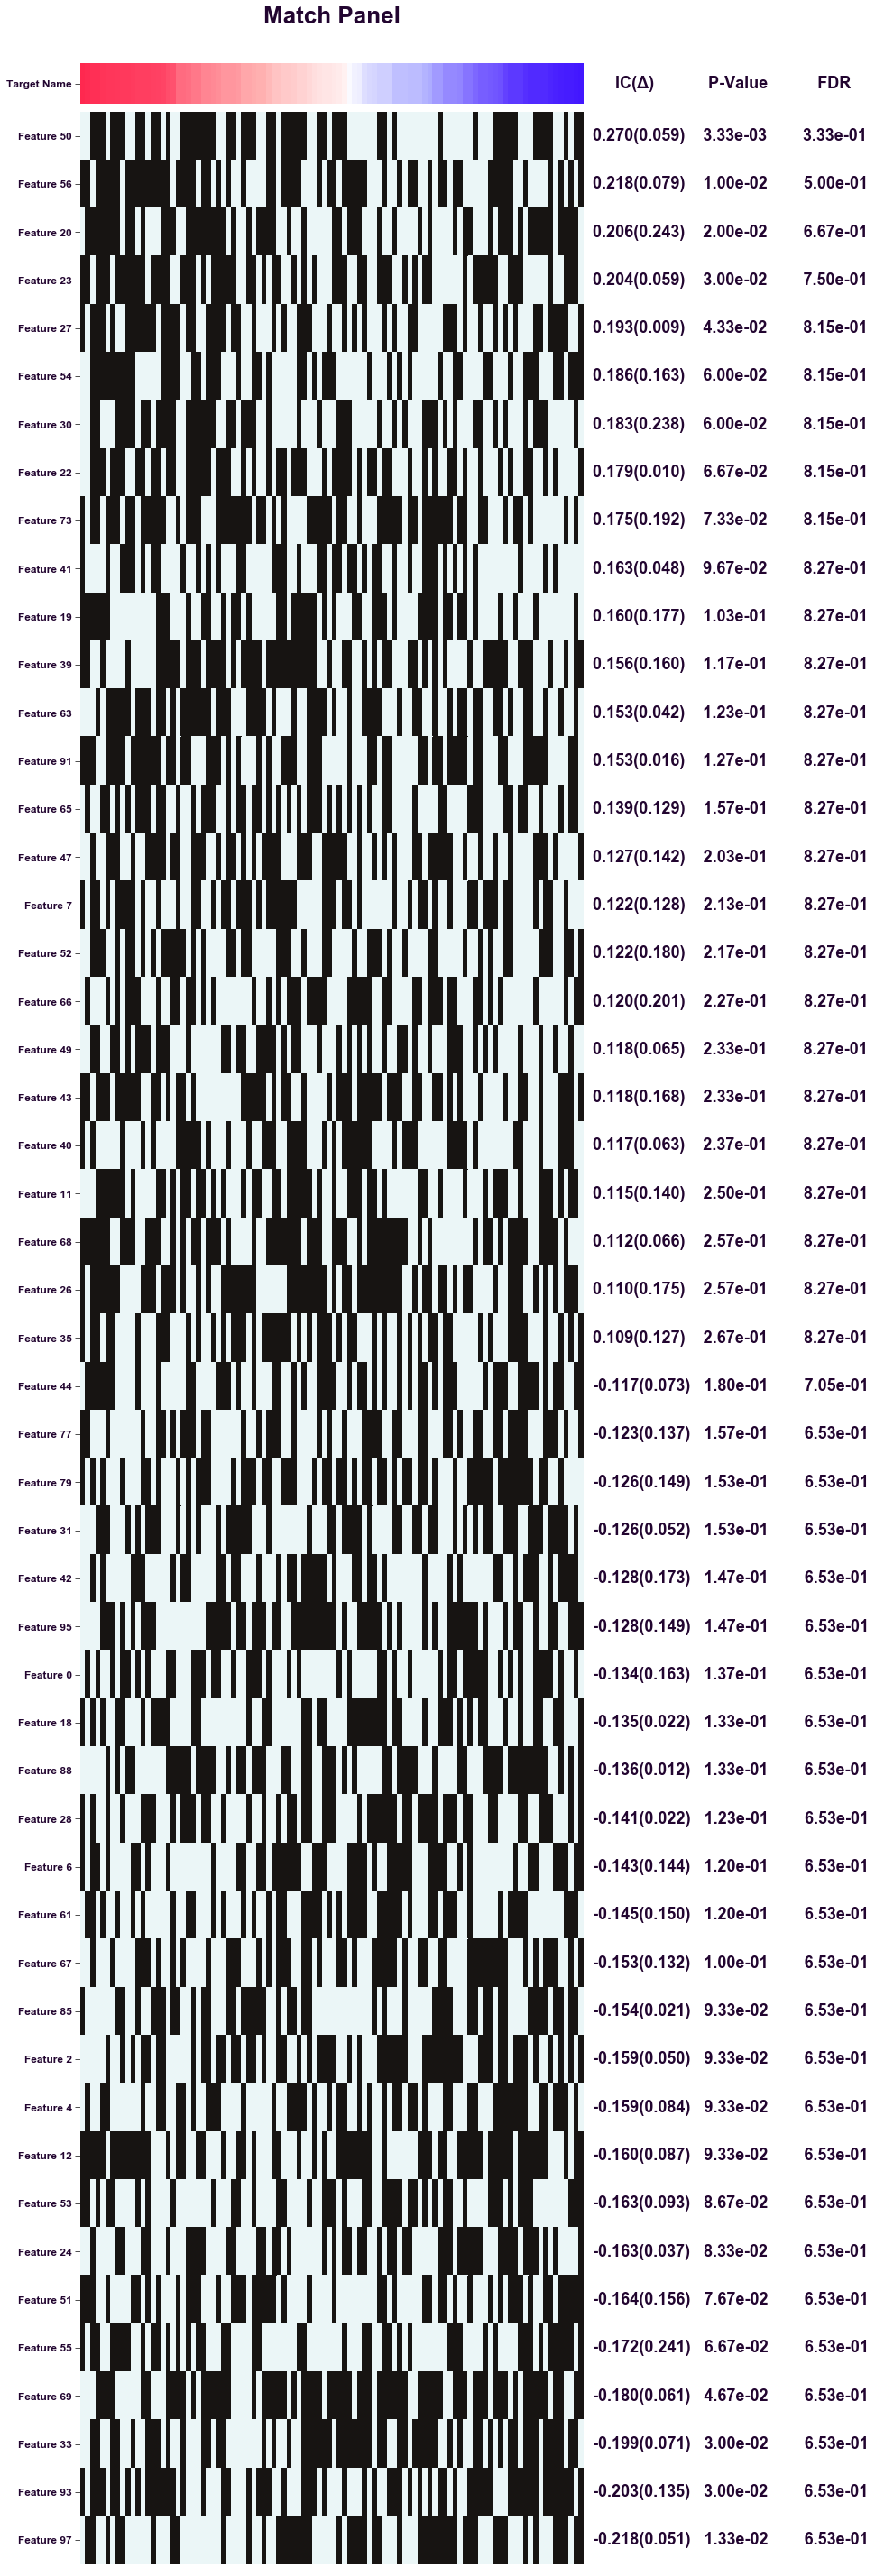

In [9]:
features_binary = pd.DataFrame(
    np.random.random_integers(0, 1, size=(
        n_row,
        n_column, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(target, features_binary, features_type='binary', n_job=2)

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x121704c80> (2 process) ...
Computing MoEs with 3 samplings ...
Computing P-Values and FDRs with 3 permutations ...
Computing P-Values and FDRs with 3 permutations ...
	1/3 ...
	1/3 ...
	3/3 - done.
	3/3 - done.


,Score,0.95 MoE,P-Value,FDR
Feature 16,0.272760,0.0895561,0.006667,0.666667
Feature 7,0.222298,NaN,0.023333,0.666667
Feature 81,0.215972,NaN,0.023333,0.666667
Feature 66,0.209005,NaN,0.026667,0.666667
Feature 78,0.199803,NaN,0.046667,0.692308
Feature 8,0.193443,NaN,0.053333,0.692308
Feature 40,0.167287,NaN,0.080000,0.692308
Feature 36,0.166233,NaN,0.083333,0.692308
Feature 4,0.161618,NaN,0.090000,0.692308
Feature 69,0.160683,NaN,0.090000,0.692308


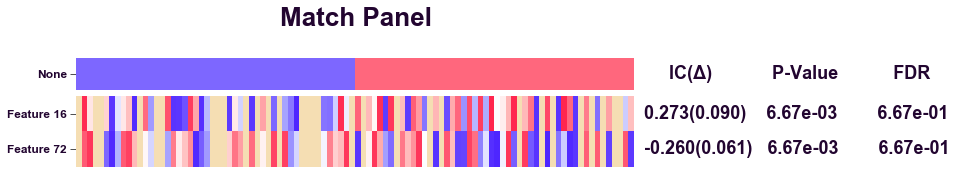

In [10]:
features_with_missing = features_continuous.copy()
features_with_missing.loc[
    np.random.choice(features_with_missing.index, size=n_column // 3),
    np.random.choice(features_with_missing.columns, size=n_column // 3)] = None

make_match_panel(
    target_str, features_with_missing, n_job=2, n_top_feature=0.99)

In [11]:
n = 3

multiple_features = {
    'Continuous features': {
        'df': features_continuous.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'continuous',
    },
    'Categorical features': {
        'df': features_categorical.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'categorical',
    },
    'Binary features': {
        'df': features_binary.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'binary',
    },
    'Cotinuous features (scores ascending)': {
        'df': features_continuous.iloc[:n, :-3],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'low',
        'data_type': 'continuous',
    },
}

Making match panel for Continuous features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x121704c80> (1 process) ...
Computing MoEs with 3 samplings ...
Computing P-Values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
Making match panel for Categorical features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x121704c80> (1 process) ...
Computing MoEs with 3 samplings ...
Computing P-Values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
Making match panel for Binary features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x121704c80> (1 process) ...
Computing MoEs with 3 samplings ...
Computing P-Values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
Making match panel for Cotinuous features (scores ascending) ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_inf

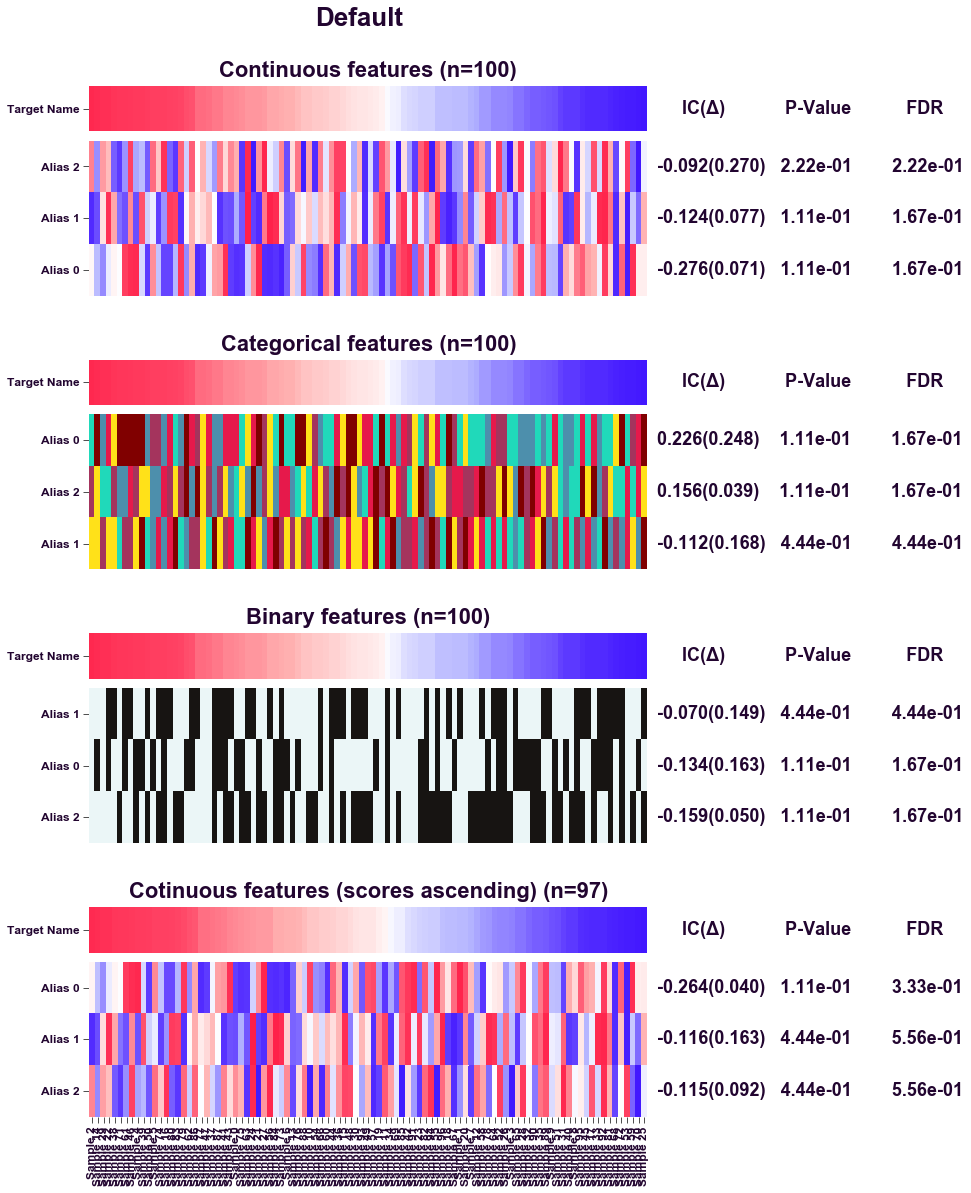

In [12]:
make_summary_match_panel(
    target, multiple_features, title='Default', plot_column_names=True)

Making match panel for Continuous features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x121704c80> (1 process) ...
Computing MoEs with 3 samplings ...
Computing P-Values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
Making match panel for Categorical features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x121704c80> (1 process) ...
Computing MoEs with 3 samplings ...
Computing P-Values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
Making match panel for Binary features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x121704c80> (1 process) ...
Computing MoEs with 3 samplings ...
Computing P-Values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
Making match panel for Cotinuous features (scores ascending) ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_inf

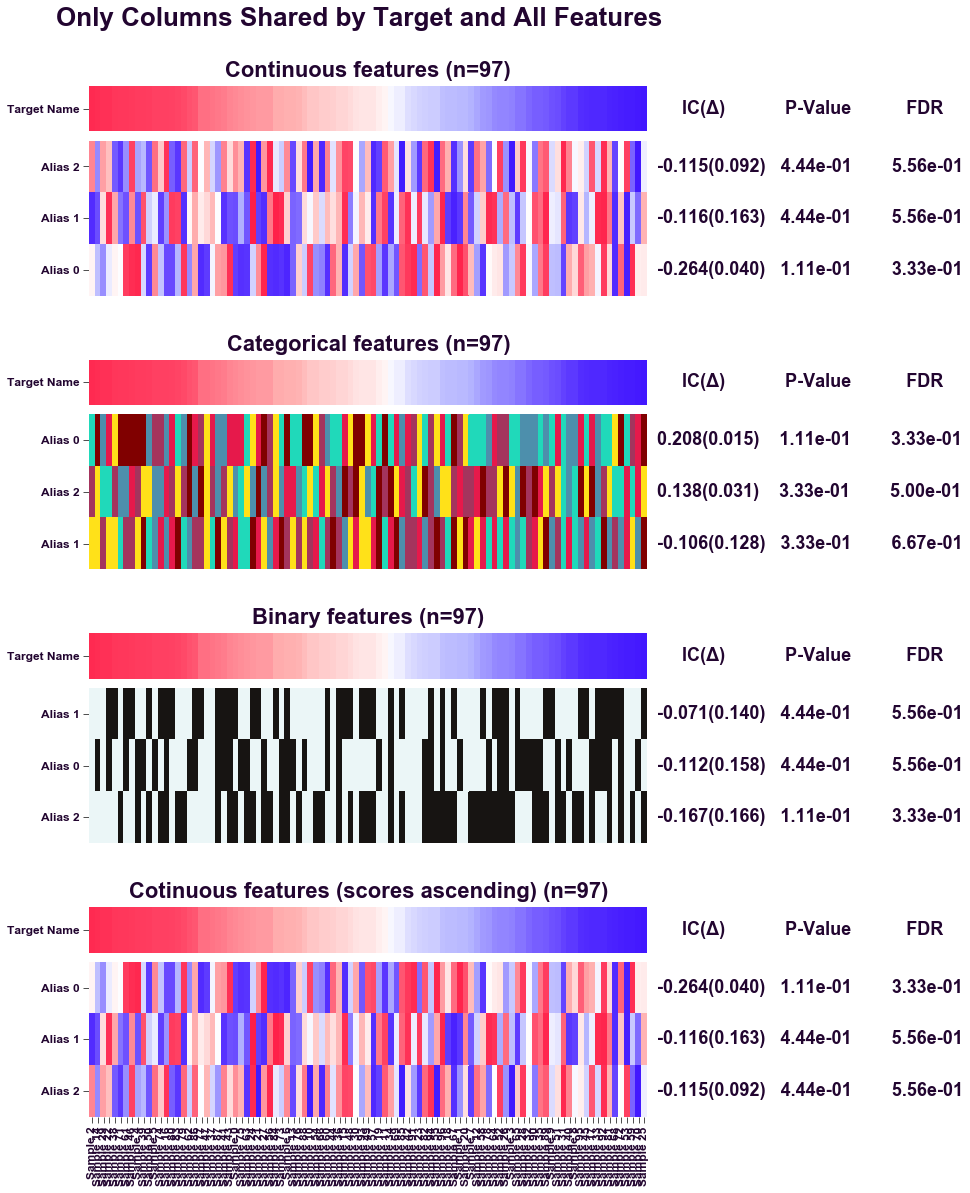

In [13]:
make_summary_match_panel(
    target,
    multiple_features,
    plot_only_columns_shared_by_target_and_all_features=True,
    title='Only Columns Shared by Target and All Features',
    plot_column_names=True)

Applying <function compute_information_coefficient at 0x121704c80> ...
	1/2 ...
	2/2 - done.


array([[-0.09401849, -0.19045333,  0.25972117, -0.12998309, -0.11371005,
         0.2481291 , -0.17253659,  0.17527843],
       [-0.15525337, -0.13069175, -0.16166484,  0.19991386, -0.17007904,
         0.20508067, -0.13476497, -0.09483742]])

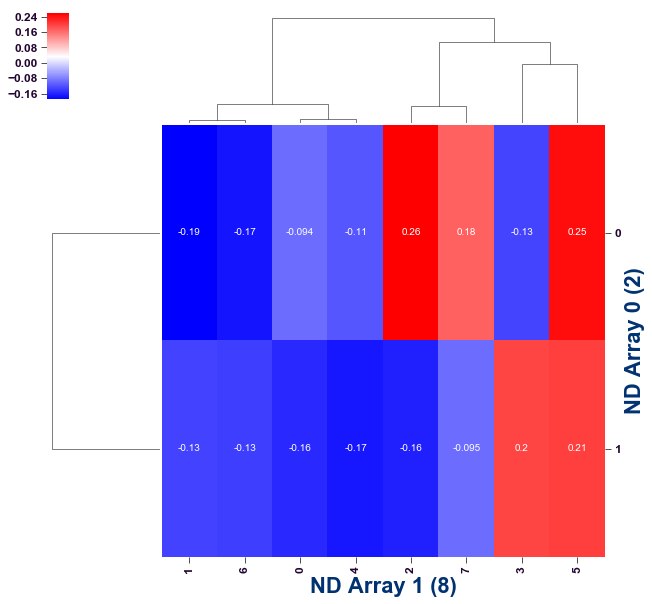

In [14]:
array_2d_0 = np.random.random_sample((
    n_row,
    2, ))

array_2d_1 = np.random.random_sample((
    n_row,
    8, ))

make_comparison_panel(
    array_2d_0,
    array_2d_1,
    array_2d_0_name='ND Array 0',
    array_2d_1_name='ND Array 1')